In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import datetime
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Traing the Machine using "customer_train.csv" Training Data Set

In [2]:
df=pd.read_csv("customer_train.csv")
df.head(10)

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0
5,5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,09-09-2013,...,6,0,0,0,0,0,0,3,11,0
6,6,6,965,1971,S1,Cerai,55635000.0,0,1,13-11-2012,...,6,0,0,0,0,0,0,3,11,0
7,7,7,6177,1985,S3,Menikah,33454000.0,1,0,08-05-2013,...,8,0,0,0,0,0,0,3,11,0
8,8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,...,9,0,0,0,0,0,0,3,11,1
9,9,9,5899,1950,S3,Bertunangan,5648000.0,1,1,13-03-2014,...,20,1,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
# Remove unwanted Columns

df=df.drop(['Unnamed: 0.1', 'Unnamed: 0','Z_CostContact','Z_Revenue'],axis=1)
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [5]:
df.shape

(1680, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   object 
 3   Marital_Status       1680 non-null   object 
 4   Income               1663 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   object 
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

In [7]:
#Checking Null value if any
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

# Missing Value in Income Checking out layers for replacement

# FInding Outlayers

In [8]:
income_column = df['Income']

#IQR
Q1 = income_column.quantile(0.25)
Q3 = income_column.quantile(0.75)
IQR = Q3 - Q1

# Lower and Upper outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers
outliers = df[(income_column < lower_bound) | (income_column > upper_bound)]

# Display Outliers
outlier_incomes = outliers['Income']
print(outlier_incomes)

164     157243000.0
617     162397000.0
655     153924000.0
687     160803000.0
1300    157733000.0
1653    157146000.0
Name: Income, dtype: float64


# Remove out layers

In [9]:
df = df[(income_column >= lower_bound) & (income_column <= upper_bound)]


In [10]:
df.shape

(1657, 27)

# Replace Null Value with Mean

In [11]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
df.isnull().sum()# Income : Initially 17 Values having null filled with Median

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [12]:
df.tail(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1660,1165,1958,S3,Lajang,50729000.0,1,1,02-05-2013,62,239000,...,2,7,6,0,0,0,0,0,0,0
1661,1404,1968,S1,Bertunangan,34916000.0,2,0,15-05-2013,89,51000,...,1,3,9,0,0,0,0,0,0,0
1662,6457,1976,S1,Cerai,64892000.0,0,1,29-05-2014,77,527000,...,4,12,4,0,0,0,0,0,0,0
1663,2639,1966,S1,Lajang,43602000.0,1,1,10-01-2014,45,19000,...,1,2,6,0,0,0,0,0,0,0
1664,8299,1989,S3,Lajang,33996000.0,0,0,11-09-2013,46,40000,...,1,3,4,0,0,0,0,0,0,0
1665,6437,1985,D3,Lajang,41473000.0,1,0,19-06-2013,80,21000,...,0,3,7,0,0,0,0,0,0,0
1666,6912,1967,S3,Menikah,63246000.0,0,2,20-08-2013,60,593000,...,3,12,4,0,0,0,0,0,0,0
1667,7327,1959,S3,Menikah,36732000.0,1,1,29-12-2013,71,21000,...,1,4,2,0,0,0,0,0,0,0
1668,5299,1970,S3,Menikah,69084000.0,1,0,19-11-2013,43,1181000,...,3,13,8,0,0,0,0,0,0,0
1669,4127,1967,S3,Menikah,77766000.0,0,1,22-02-2013,97,1004000,...,10,11,6,1,0,0,0,0,0,1


# Adding Total Columns for Acceptance of Campain by Customers

In [13]:
df['Accepted_Total'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [14]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Accepted_Total'],
      dtype='object')

# Evaluating the Result of Campain By Customers

In [15]:
Cus_AcceptCampain = df[df.Accepted_Total!=0]
print('Campain Total', Cus_AcceptCampain.shape)
print('Total : ',df.shape)

Campain Total (339, 28)
Total :  (1657, 28)


In [16]:
Percentage = round(339/1657*100,0)
print('Out of ',len(df),' customers ', Percentage,"%","Customers Accepted Campain")

Out of  1657  customers  20.0 % Customers Accepted Campain


# Out of 1657 customers 20 % Customers Accepted Campain

In [17]:
Response = df[df.Response==1]
Response.shape

(242, 28)

In [18]:
ResponsePercent = round(242/1657*100,0)
print('Out of ',len(df),' customers ', Percentage,"%","Customers Accepted Offers in Campain")

Out of  1657  customers  20.0 % Customers Accepted Offers in Campain


# Out of 1657 customers 20 % Customers Accepted Offers in Campain

# Customer behaviour of Campain Acceptance and Offers based on Education

In [19]:
#Rename the Education Level

eduReplace = {
    'S1':'Degree',
    'S2':'PG',
    'S3':'PHD',
    'D3':'Plus_2 ',
    'SMA':'High SChool'
    
}

# Replace the Education values
df['Education'].replace(eduReplace, inplace=True)

In [20]:
df["Education"].value_counts()

Education
Degree         823
PHD            366
PG             276
Plus_2         157
High SChool     35
Name: count, dtype: int64

In [21]:
df_Education_Campain = df[['Education','Accepted_Total','Response']]
df_Education_Campain

,Education,Accepted_Total,Response
0,Degree,0,1
1,Degree,0,0
2,Degree,0,0
3,Degree,0,0
4,PHD,0,0
...,...,...,...
1675,Plus_2,0,0
1676,Degree,0,0
1677,High SChool,0,0
1678,PHD,0,0


In [22]:
df_Education_Campain.groupby('Education').mean()

,Accepted_Total,Response
Education,,
Degree,0.303767,0.138518
High SChool,0.142857,0.028571
PG,0.250000,0.137681
PHD,0.338798,0.199454
Plus_2,0.216561,0.101911


# From above table we can draw following conclusions :


# Education Level PHD Accepted Campains MORE
# Education Level High School Accepted Campains LESS

# Education Level PHD Accepted Offers MORE
# Education Level High School Accepted Offers LESS



# Purchase behaviour on the basis of Education

In [23]:
df_Education_Purchase = df[['Education','MntCoke','MntFruits','MntMeatProducts','MntFishProducts',
                            'MntSweetProducts','MntGoldProds']]
df_Education_Purchase

,Education,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Degree,635000,88000,546000,172000,88000,88000
1,Degree,11000,1000,6000,2000,1000,6000
2,Degree,426000,49000,127000,111000,21000,42000
3,Degree,11000,4000,20000,10000,3000,5000
4,PHD,173000,43000,118000,46000,27000,15000
...,...,...,...,...,...,...,...
1675,Plus_2,8000,8000,22000,24000,11000,9000
1676,Degree,50000,15000,110000,39000,15000,15000
1677,High SChool,1000,1000,4000,11000,9000,10000
1678,PHD,308000,0,73000,0,0,23000


In [24]:
df_Education_Purchase.groupby('Education').mean()

,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
Degree,288122.721750,30750.911300,182579.586877,43464.155529,32315.917375,50927.095990
High SChool,3285.714286,10085.714286,9571.428571,13742.857143,10485.714286,23257.142857
PG,337065.217391,21275.362319,155086.956522,30840.579710,20159.420290,39902.173913
PHD,405420.765027,19918.032787,160330.601093,27303.278689,19759.562842,30915.300546
Plus_2,191726.114650,27757.961783,125961.783439,44152.866242,32484.076433,44509.554140


# From above table we can draw following conclusions :
# Purchases on the Basis of Education
# COKE    : Education Level PHD More and HIGH SCHOOL Less 
# FRUIT   : Education Level DEGREE More and HIGH SCHOOL Less 
# MEAT    : Education Level DEGREE More and HIGH SCHOOL Less 
# FISH      : Education Level PLUS_2 More and HIGH SCHOOL Less 
# SWEET : Education Level PLUS_2 More and HIGH SCHOOL Less 
# GOLD    : Education Level DEGREE More and HIGH SCHOOL Less 

# Evaluation of Customers Campain Acceptance by Marital Status

In [25]:
#Rename the Marital Status

eduReplace = {
    'Menikah':'To be married',
    'Bertunangan':'Engaged',
    'Lajang':'Unmarried',
    'Cerai':'divorced ',
    'Widowed':'Widow',
    'Duda' : 'Widower',
    'Janda':'Widowed'
    
}

# Replace the Education values
df['Marital_Status'].replace(eduReplace, inplace=True)

In [26]:
df["Marital_Status"].value_counts()

Marital_Status
To be married    642
Engaged          431
Unmarried        353
divorced         176
Widowed           52
Widower            3
Name: count, dtype: int64

In [27]:
df_Marital_Status_Campain = df[['Marital_Status','Accepted_Total','Response']]
df_Marital_Status_Campain

,Marital_Status,Accepted_Total,Response
0,Unmarried,0,1
1,Unmarried,0,0
2,Engaged,0,0
3,Engaged,0,0
4,To be married,0,0
...,...,...,...
1675,Engaged,0,0
1676,To be married,0,0
1677,Unmarried,0,0
1678,To be married,0,0


In [28]:
df_Marital_Status_Campain.groupby('Marital_Status').mean()

,Accepted_Total,Response
Marital_Status,,
Engaged,0.301624,0.099768
To be married,0.289720,0.110592
Unmarried,0.277620,0.226629
Widowed,0.250000,0.192308
Widower,0.333333,0.333333
divorced,0.306818,0.210227


# From above table we can draw following conclusions :


# Marital_Status  Widower Accepted Campains MORE
# Marital_Status Widowed Accepted Campains LESS

# Marital_Status Widower Accepted Offers MORE
# Marital_Status Engaged Accepted Offers LESS

# Purchase behaviour on the basis of Marital_Status

In [29]:
df_Marital_Status_Purchase = df[['Marital_Status','MntCoke','MntFruits','MntMeatProducts','MntFishProducts',
                            'MntSweetProducts','MntGoldProds']]
df_Marital_Status_Purchase

,Marital_Status,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Unmarried,635000,88000,546000,172000,88000,88000
1,Unmarried,11000,1000,6000,2000,1000,6000
2,Engaged,426000,49000,127000,111000,21000,42000
3,Engaged,11000,4000,20000,10000,3000,5000
4,To be married,173000,43000,118000,46000,27000,15000
...,...,...,...,...,...,...,...
1675,Engaged,8000,8000,22000,24000,11000,9000
1676,To be married,50000,15000,110000,39000,15000,15000
1677,Unmarried,1000,1000,4000,11000,9000,10000
1678,To be married,308000,0,73000,0,0,23000


In [30]:
df_Marital_Status_Purchase.groupby('Marital_Status').mean()

,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Engaged,316561.484919,24955.916473,164162.412993,38714.617169,26510.440835,44048.723898
To be married,301445.482866,24615.264798,156183.800623,33975.077882,26210.280374,40288.161994
Unmarried,294203.966006,28651.558074,188968.838527,41351.274788,27634.560907,45439.093484
Widowed,331826.923077,30538.461538,158365.384615,46961.538462,35057.692308,49846.153846
Widower,184666.666667,4000.000000,26333.333333,7666.666667,7000.000000,27000.000000
divorced,324579.545455,27886.363636,146676.136364,34823.863636,28448.863636,48181.818182


# From above table we can draw following conclusions :
# Purchases on the Basis of Marital_Status
# COKE    : Marital_Status Widowed More and Widower Less 
# FRUIT   : Marital_Status Widowed More and Widower Less 
# MEAT    : Marital_Status Widowed More and Widower Less 
# FISH    : Marital_Status Widowed More and Widower Less 
# SWEET   : Marital_Status Widowed More and Widower Less  
# GOLD    : Marital_Status Widowed More and Widower Less 

# Evaluation of Customers Campain Acceptance based on Family

In [31]:
df_Family_Campain = df[['Accepted_Total','Kidhome','Teenhome',]]
df_Family_Campain

,Accepted_Total,Kidhome,Teenhome
0,0,0,0
1,0,1,1
2,0,0,0
3,0,1,0
4,0,1,0
...,...,...,...
1675,0,0,0
1676,0,1,0
1677,0,1,0
1678,0,1,0


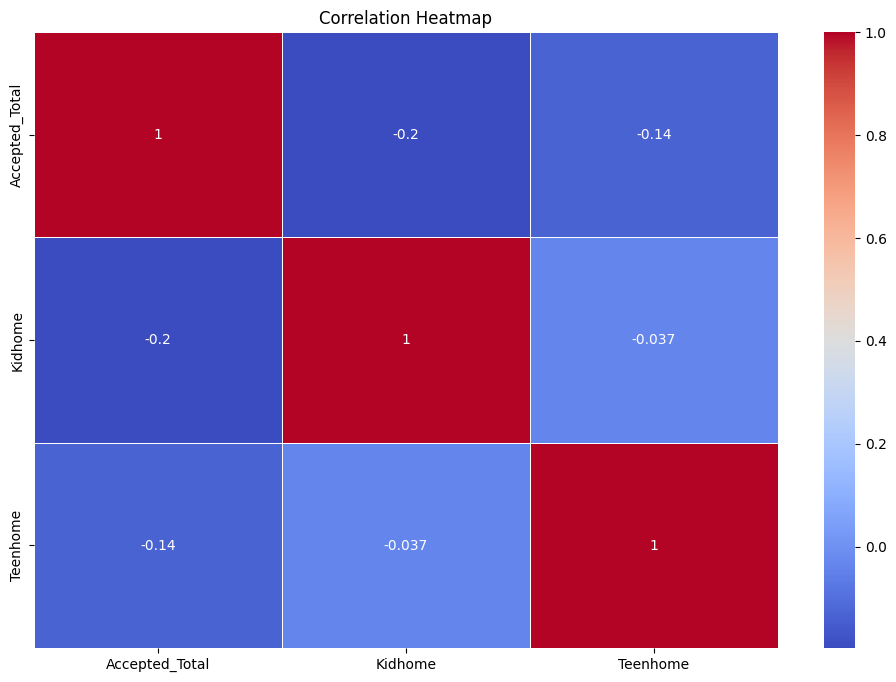

In [32]:
corr_matrix = df_Family_Campain.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
df_Family_Campain.groupby('Accepted_Total').mean()

,Kidhome,Teenhome
Accepted_Total,,
0,0.502276,0.531866
1,0.298755,0.431535
2,0.114754,0.262295
3,0.137931,0.172414
4,0.000000,0.250000


# From above table we can draw following conclusions :
# Campain Acceptance by Teenhome more than Kidhome

# Evaluation of Customers Offer Acceptance based on Family

In [34]:
df_Family_Offer = df[['Response','Kidhome','Teenhome',]]
df_Family_Offer

,Response,Kidhome,Teenhome
0,1,0,0
1,0,1,1
2,0,0,0
3,0,1,0
4,0,1,0
...,...,...,...
1675,0,0,0
1676,0,1,0
1677,0,1,0
1678,0,1,0


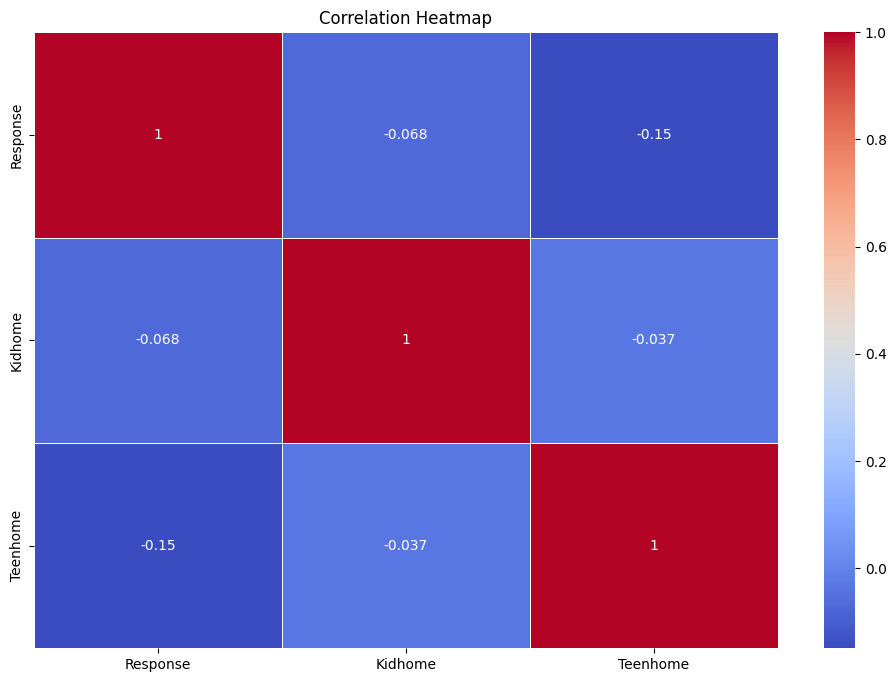

In [35]:
corr_matrix = df_Family_Offer.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [36]:
df_Family_Offer.groupby('Response').mean()

,Kidhome,Teenhome
Response,,
0,0.465018,0.533569
1,0.359504,0.301653


# From above table we can draw following conclusions :
# Offers Acceptance by Teenhome more than Kidhome

In [37]:
df["Spent"] = df["MntCoke"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

# Plotting For Trent Analysis Based on Income

# Income vs. Spending

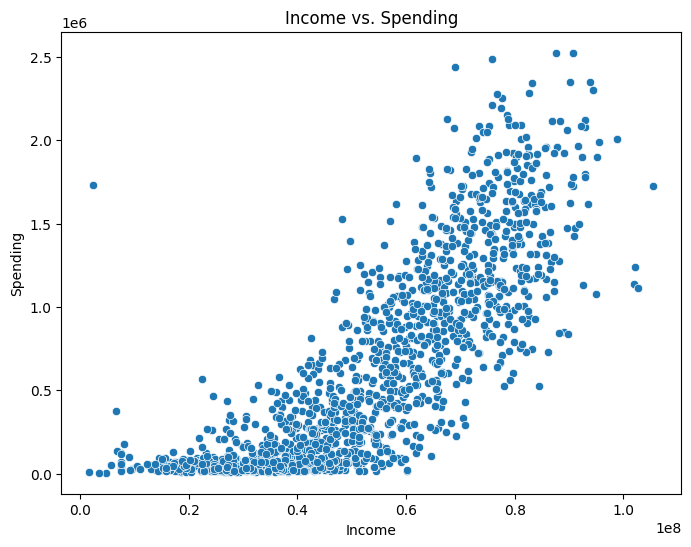

In [38]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Spent', data=df)
plt.title('Income vs. Spending')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

# Low Income group Spent less High income group spent more

# Observing the Charactor of Data

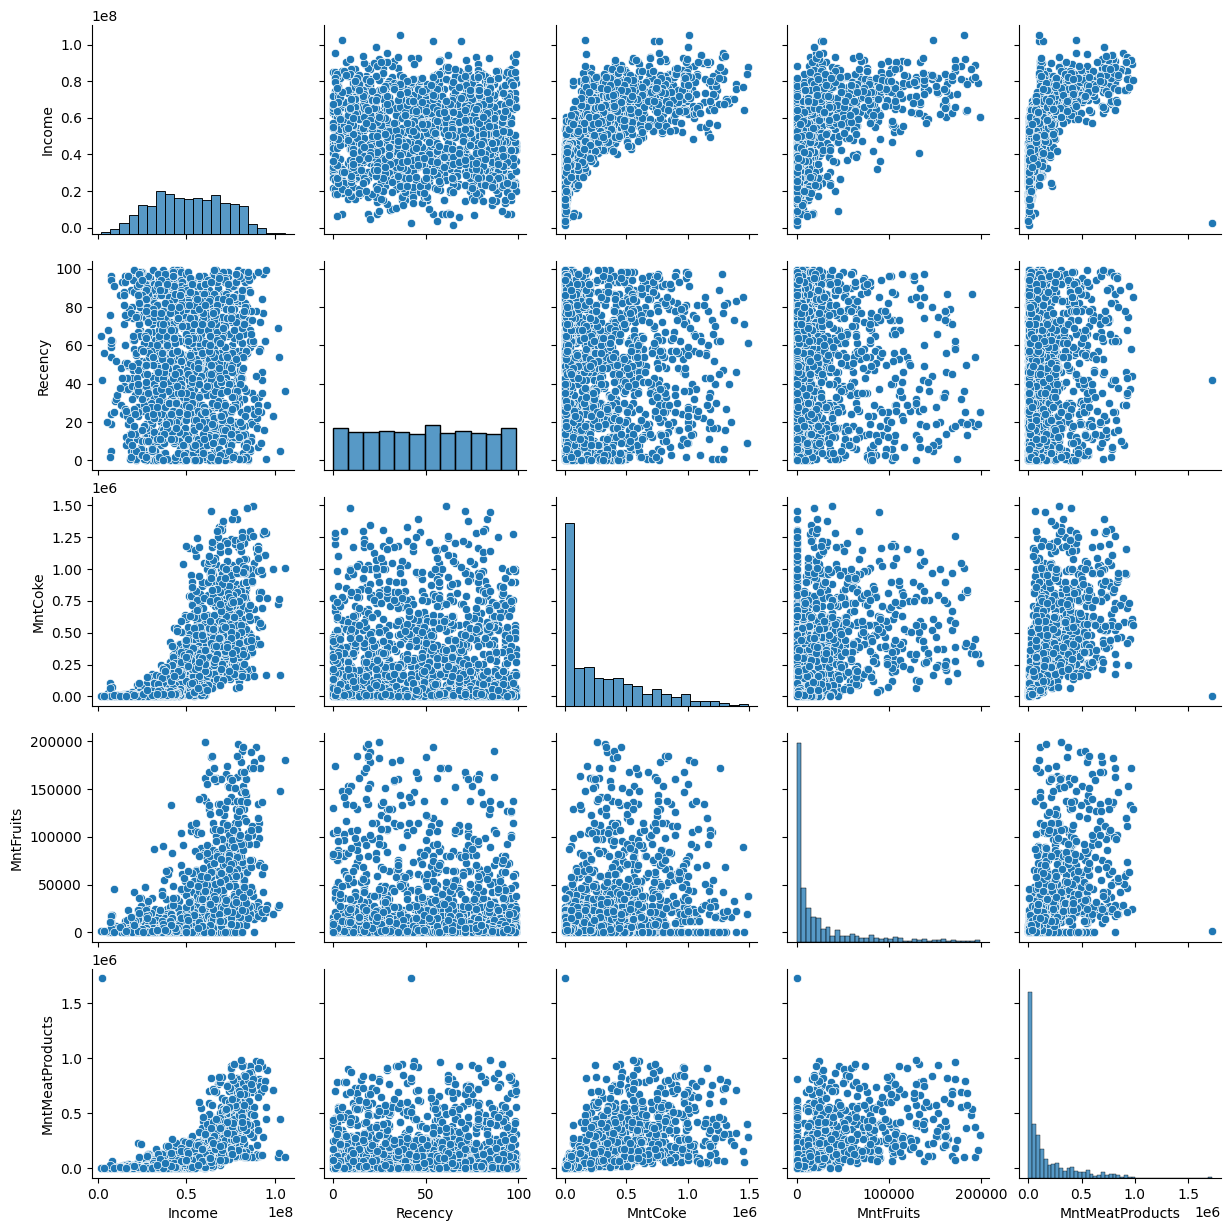

In [39]:
sns.pairplot(df[['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts']])
plt.show()

# Adding Age and Drop Age related Columns

In [40]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Accepted_Total', 'Spent'],
      dtype='object')

In [41]:
df["Age"] = 2023-df["Year_Birth"]
print("Minimum Age : ",df.Age.min())
print("Maximum Age : ",df.Age.max())

Minimum Age :  27
Maximum Age :  130


# Outlayers found in the Age need to Remove

In [42]:
df = df[(df["Age"]<95)]
print("The total Customers after removal of outliers :", len(df))

The total Customers after removal of outliers : 1654


In [43]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Accepted_Total', 'Spent',
       'Age'],
      dtype='object')

In [44]:
to_drop = ["Dt_Customer","Year_Birth", "ID"]
df= df.drop(to_drop, axis=1)

In [45]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Accepted_Total', 'Spent', 'Age'],
      dtype='object')

# Labeling Categorical Variable in to Numeric

In machine learning, data labeling is the process of identifying raw data (images, text files, videos, etc.) and adding one or more meaningful and informative labels to provide context so that a machine learning model can learn from it.

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
dfL = df
Ob = (df.dtypes == 'object')
object_Items = list(Ob[Ob].index)

In [48]:
LE = LabelEncoder()
for i in object_Items:
    dfL[i]=df[[i]].apply(LE.fit_transform)
    
print("Succefully.....! transferred to numerical")

Succefully.....! transferred to numerical


In [49]:
dfL.head(20)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accepted_Total,Spent,Age
0,0,2,58138000.0,0,0,58,635000,88000,546000,172000,...,0,0,0,0,0,0,1,0,1617000,66
1,0,2,46344000.0,1,1,38,11000,1000,6000,2000,...,0,0,0,0,0,0,0,0,27000,69
2,0,0,71613000.0,0,0,26,426000,49000,127000,111000,...,0,0,0,0,0,0,0,0,776000,58
3,0,0,26646000.0,1,0,26,11000,4000,20000,10000,...,0,0,0,0,0,0,0,0,53000,39
4,3,1,58293000.0,1,0,94,173000,43000,118000,46000,...,0,0,0,0,0,0,0,0,422000,42
5,2,0,62513000.0,0,1,16,520000,42000,98000,0,...,0,0,0,0,0,0,0,0,716000,56
6,0,5,55635000.0,0,1,34,235000,65000,164000,50000,...,0,0,0,0,0,0,0,0,590000,52
7,3,1,33454000.0,1,0,32,76000,10000,56000,3000,...,0,0,0,0,0,0,0,0,169000,38
8,3,0,30351000.0,1,0,19,14000,0,24000,3000,...,0,0,0,0,0,0,1,0,46000,49
9,3,0,5648000.0,1,1,68,28000,0,6000,1000,...,1,0,0,0,0,0,0,1,49000,73


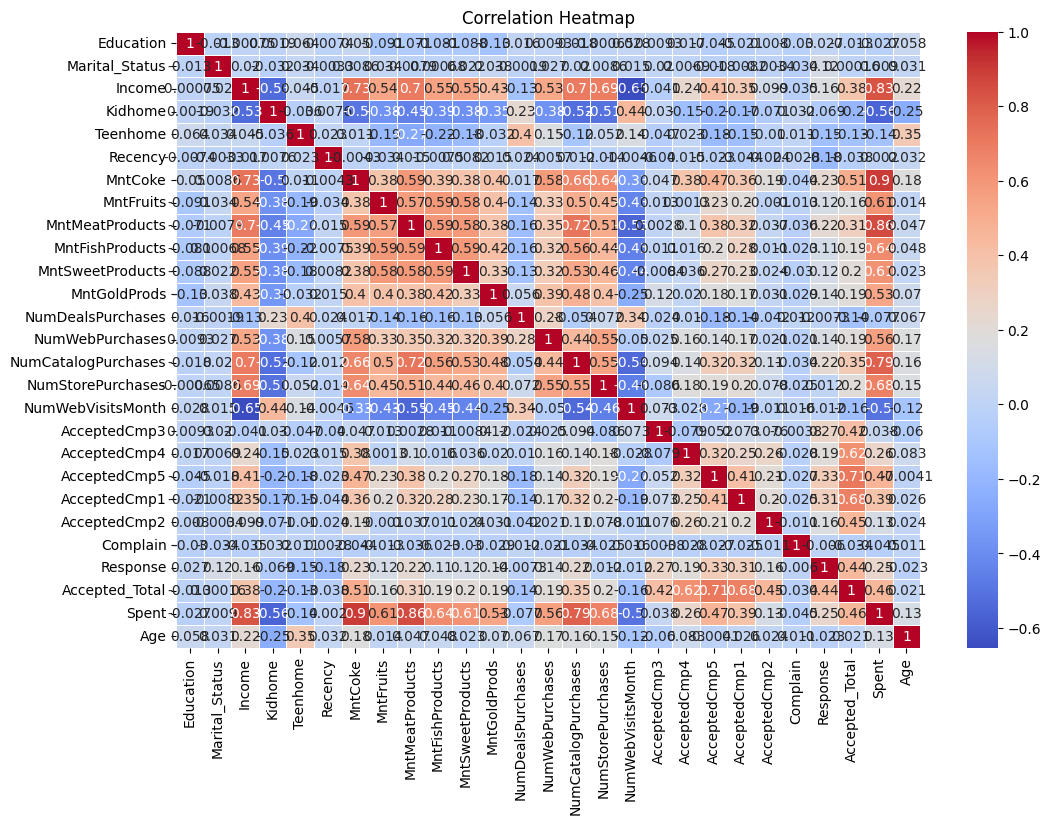

In [50]:
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Scaling : normalize the features in the dataset into a finite range

Feature scaling is the process of normalizing the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range, and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

In [51]:
dscale = dfL
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
dscale = dscale.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(dscale)
Modeling_df = pd.DataFrame(scaler.transform(dscale),columns= dscale.columns )
print("Scaled Succefully.....!")

Scaled Succefully.....!


In [52]:
#Scaled data set
print("FINAL DATA FRAME FOR MODELING")
Modeling_df.head()

FINAL DATA FRAME FOR MODELING


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Accepted_Total,Spent,Age
0,-0.930527,0.382482,0.317619,-0.825309,-0.90985,0.309386,0.966272,1.567917,1.767897,2.477115,1.474157,0.878503,0.350721,1.510742,2.616962,-0.563648,0.675840,-0.436807,1.684471,1.024745
1,-0.930527,0.382482,-0.256606,1.009450,0.90985,-0.382975,-0.872676,-0.632804,-0.731335,-0.647434,-0.631104,-0.736866,-0.173775,-1.170338,-0.585611,-1.182071,-0.144894,-0.436807,-0.961725,1.281916
2,-0.930527,-0.994287,0.973689,-0.825309,-0.90985,-0.798392,0.350342,0.581387,-0.171322,1.355953,-0.147136,-0.027680,-0.698271,1.510742,-0.229769,1.291623,-0.555261,-0.436807,0.284816,0.338956
3,-0.930527,-0.994287,-1.215660,1.009450,-0.90985,-0.798392,-0.872676,-0.556917,-0.666540,-0.500397,-0.582707,-0.756565,-0.173775,-0.787327,-0.941452,-0.563648,0.265473,-0.436807,-0.918454,-1.289794
4,1.075240,-0.305903,0.325166,1.009450,-0.90985,1.555635,-0.395257,0.429613,-0.212976,0.161272,-0.001946,-0.559569,1.399714,0.361707,0.126072,0.054776,-0.144894,-0.436807,-0.304337,-1.032623


# Test Data Analysis

# Testing Data Model Using "customer_test.csv" Testing Data Set

In [53]:
test=pd.read_csv("customer_test.csv")
test.head(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,84,...,5,0,0,0,0,0,0,3,11,0
1,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,38,...,5,0,0,0,0,0,0,3,11,0
2,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,53,...,3,0,0,0,0,0,0,3,11,0
3,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,88,...,5,0,0,0,0,0,0,3,11,0
4,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,99,...,5,0,0,0,0,0,0,3,11,0
5,1686,1891,1980,S2,Cerai,78789000.0,0,0,08-08-2012,12,...,2,0,0,0,0,0,0,3,11,1
6,1687,2570,1968,S1,Bertunangan,56534000.0,0,1,23-07-2013,35,...,8,0,1,0,0,1,0,3,11,1
7,1688,9256,1971,S1,Lajang,58350000.0,0,1,04-01-2013,5,...,6,0,0,0,0,0,0,3,11,0
8,1689,295,1989,S1,Lajang,81217000.0,0,0,19-07-2013,77,...,1,0,0,0,0,0,0,3,11,0
9,1690,7397,1951,S1,Lajang,49090000.0,0,1,19-07-2013,45,...,7,0,0,0,0,0,0,3,11,0


In [54]:
test.shape

(559, 30)

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           559 non-null    int64  
 1   ID                   559 non-null    int64  
 2   Year_Birth           559 non-null    int64  
 3   Education            559 non-null    object 
 4   Marital_Status       559 non-null    object 
 5   Income               552 non-null    float64
 6   Kidhome              559 non-null    int64  
 7   Teenhome             559 non-null    int64  
 8   Dt_Customer          559 non-null    object 
 9   Recency              559 non-null    int64  
 10  MntCoke              559 non-null    int64  
 11  MntFruits            559 non-null    int64  
 12  MntMeatProducts      559 non-null    int64  
 13  MntFishProducts      559 non-null    int64  
 14  MntSweetProducts     559 non-null    int64  
 15  MntGoldProds         559 non-null    int

In [56]:
test.isnull().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 7
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Income 7 Missing Values need to Replace with Mean

# Finding Out Layers

In [57]:
income_outlayer = test['Income']

# IQR (Interquartile Range)
Q1 = income_outlayer.quantile(0.25)
Q3 = income_outlayer.quantile(0.75)
IQR = Q3 - Q1

#lower bound and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = test[(income_outlayer < lower_bound) | (income_outlayer > upper_bound)]
outlier_incomes = outliers['Income']
print("Income Outliers:")
print(outlier_incomes)

Income Outliers:
451    156924000.0
552    666666000.0
Name: Income, dtype: float64


In [58]:
data_no_outliers = test[(income_outlayer >= lower_bound) & (income_outlayer <= upper_bound)]

# Test Data without outliers
print("Test Data without outliers:")
print(data_no_outliers['Income'])

Test Data without outliers:
0      38232000.0
1      22554000.0
2      23536000.0
3      49413000.0
4      42231000.0
          ...    
554    61223000.0
555    64014000.0
556    56981000.0
557    69245000.0
558    52869000.0
Name: Income, Length: 550, dtype: float64


In [59]:
data_no_outliers.Income.tail(20)

537    22775000.0
538    40101000.0
539    58025000.0
540    75777000.0
541     7500000.0
542    33562000.0
543    57642000.0
544    58554000.0
545    63777000.0
546    57967000.0
548    24434000.0
549    11012000.0
550    44802000.0
551    26816000.0
553    34421000.0
554    61223000.0
555    64014000.0
556    56981000.0
557    69245000.0
558    52869000.0
Name: Income, dtype: float64

# Replace Out Layers with Mean of Without Outlayer Data

In [60]:
data_no_outliers.Income.mean()

51610956.36363637

In [61]:
values_to_replace = {156924000.0: 51610956, 666666000.0 : 51610956}
test['Income'] = test['Income'].replace(values_to_replace)

# Print the updated DataFrame
test.tail(20).Income

539    58025000.0
540    75777000.0
541     7500000.0
542    33562000.0
543    57642000.0
544    58554000.0
545    63777000.0
546    57967000.0
547           NaN
548    24434000.0
549    11012000.0
550    44802000.0
551    26816000.0
552    51610956.0
553    34421000.0
554    61223000.0
555    64014000.0
556    56981000.0
557    69245000.0
558    52869000.0
Name: Income, dtype: float64

# Fill NA of Income Using Mean value

In [62]:
test['Income'].fillna(test['Income'].mean(), inplace=True)
test.isnull().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [63]:
test["Dt_Customer"] = pd.to_datetime(test["Dt_Customer"])

C:\Users\VINOD VM\AppData\Local\Temp\ipykernel_5952\3609367120.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test["Dt_Customer"] = pd.to_datetime(test["Dt_Customer"])


# Name Change for Easy Identification of Objects

In [64]:
print(test["Education"].value_counts())
print(test["Marital_Status"].value_counts())

Education
S1     292
S3     113
S2      91
D3      44
SMA     19
Name: count, dtype: int64
Marital_Status
Menikah        214
Bertunangan    141
Lajang         124
Cerai           55
Janda           25
Name: count, dtype: int64


In [65]:
marital_status_mapping = {
    'Lajang': 'Single',
    'Menikah': 'Married',
    'Bertunangan':'Engaged',
    'Cerai':'Divorced',
    'Janda':'Widowed',

}

test['Marital_Status'].replace(marital_status_mapping, inplace=True)


eduReplace = {
    'S1':'Degree',
    'S2':'PG',
    'S3':'PHD',
    'D3':'Plus_2 ',
    'SMA':'High SChool'
    
}

# Replace the Education values
test['Education'].replace(eduReplace, inplace=True)
print(test["Education"].value_counts())
print(test["Marital_Status"].value_counts())

Education
Degree         292
PHD            113
PG              91
Plus_2          44
High SChool     19
Name: count, dtype: int64
Marital_Status
Married     214
Engaged     141
Single      124
Divorced     55
Widowed      25
Name: count, dtype: int64


# Adding Age Columns

In [66]:
test["Age"] = 2023-test["Year_Birth"]
test.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

# Adding Total Spent Columns

In [67]:
test["Spent"] = test["MntCoke"]+ test["MntFruits"]+ test["MntMeatProducts"]+ test["MntFishProducts"]+ test["MntSweetProducts"]+ test["MntGoldProds"]
test.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Spent'],
      dtype='object')

# Adding Total Campanin Acceptance Columns

In [68]:
test['Accepted_Total'] = test['AcceptedCmp1'] + test['AcceptedCmp2'] + test['AcceptedCmp3'] + test['AcceptedCmp4'] + test['AcceptedCmp5']
test.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Spent', 'Accepted_Total'],
      dtype='object')

In [69]:
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID","Unnamed: 0",'Dt_Customer']
test= test.drop(to_drop, axis=1)


# Checking Data 

In [70]:
test.describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Accepted_Total
count,5.590000e+02,559.000000,559.000000,559.000000,5.590000e+02,559.000000,5.590000e+02,559.000000,559.000000,559.000000,...,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02,559.000000
mean,5.161096e+07,0.420394,0.525939,49.187835,3.003488e+05,27293.381038,1.698909e+05,39171.735242,27067.978533,45992.844365,...,0.076923,0.075134,0.084079,0.067979,0.017889,0.007156,0.164580,54.336315,6.097657e+05,0.322004
std,2.106018e+07,0.511880,0.527682,29.109522,3.303610e+05,40361.180414,2.300301e+05,56039.372894,40472.819695,54524.598562,...,0.266708,0.263844,0.277754,0.251935,0.132667,0.084363,0.371133,11.867607,6.035638e+05,0.718470
min,4.023000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,8.000000e+03,0.000000
25%,3.438550e+07,0.000000,0.000000,25.000000,2.300000e+04,2000.000000,1.500000e+04,3000.000000,2000.000000,9000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,6.800000e+04,0.000000
50%,5.161096e+07,0.000000,1.000000,49.000000,1.750000e+05,8000.000000,6.400000e+04,12000.000000,8000.000000,25000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,4.130000e+05,0.000000
75%,6.915900e+07,1.000000,1.000000,74.000000,5.140000e+05,35000.000000,2.245000e+05,55000.000000,37500.000000,58500.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.500000,1.059500e+06,0.000000
max,1.137340e+08,2.000000,2.000000,99.000000,1.493000e+06,194000.000000,1.607000e+06,258000.000000,262000.000000,321000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,83.000000,2.257000e+06,4.000000


# Labeling

In machine learning, data labeling is the process of identifying raw data (images, text files, videos, etc.) and adding one or more meaningful and informative labels to provide context so that a machine learning model can learn from it.

In [71]:
C = (test.dtypes == 'object')
object_cols = list(C[C].index)

print("Categorical variables:", object_cols)

Categorical variables: ['Education', 'Marital_Status']


In [72]:
Label =LabelEncoder()
for i in object_cols:
    test[i]=test[[i]].apply(Label.fit_transform)
    
print("Successfully.....! converted Object into Numerical")

Successfully.....! converted Object into Numerical


# Scalling

Feature scaling is the process of normalizing the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range, and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

In [73]:
dt = test.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
dt = dt.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(dt)
scaled_dt = pd.DataFrame(scaler.transform(dt),columns= dt.columns )
print("Features Successfully.....! Scalled")

Features Successfully.....! Scalled


# Reduction of Data Set using Principal component analysis (PCA) 

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [74]:
# Reduction of data set for accurassy hence the data having more depentent values
pca = PCA(n_components=3)
pca.fit(Modeling_df)
PCA_ds = pd.DataFrame(pca.transform(Modeling_df), columns=(["A","B","C"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1654.0,-1.288772e-17,2.737142,-4.921253,-2.525342,-0.717045,2.356050,7.763409
B,1654.0,4.295905e-17,1.423407,-2.891921,-1.157613,-0.157311,0.986589,4.870565
C,1654.0,6.443858e-18,1.126403,-3.199394,-0.763007,0.000041,0.720268,5.516187


# Applying Elbow Method : To determine Number of Clusters Required

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

In [75]:
pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

Elbow Method : To determine Number of Clusters Required


C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\

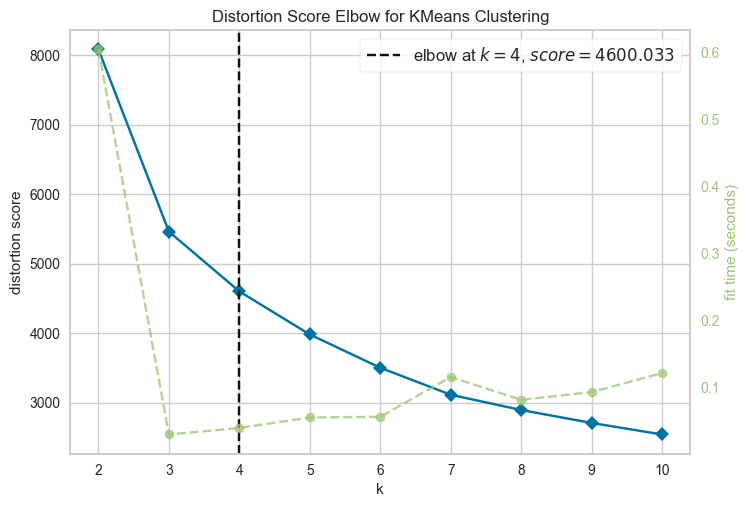

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
print('Elbow Method : To determine Number of Clusters Required')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

# As per the result 4 Number of Clusters Required

# Checking silhouette score of clustering model and data

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished.

In [78]:
from sklearn.metrics import silhouette_score

In [79]:
score = silhouette_score(Modeling_df,Elbow_M.labels_, metric='euclidean')
score

0.08776441223986824

# Score 0.088 ranges from -1 to 1, 
# Higher score = objects in one cluster are more similar to each other and not similar to the objects in other clusters.

# K-Means Clustering

# Train Data K Means

In [80]:
km = KMeans(n_clusters=4)
y_km = km.fit_predict(Modeling_df)
Modeling_df["Clusters"] = y_km

C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [81]:
y_km

array([2, 0, 1, ..., 3, 3, 3])

In [82]:
Modeling_df["Clusters"]=y_km
Modeling_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Accepted_Total,Spent,Age,Clusters
0,-0.930527,0.382482,0.317619,-0.825309,-0.90985,0.309386,0.966272,1.567917,1.767897,2.477115,...,0.878503,0.350721,1.510742,2.616962,-0.563648,0.675840,-0.436807,1.684471,1.024745,2
1,-0.930527,0.382482,-0.256606,1.009450,0.90985,-0.382975,-0.872676,-0.632804,-0.731335,-0.647434,...,-0.736866,-0.173775,-1.170338,-0.585611,-1.182071,-0.144894,-0.436807,-0.961725,1.281916,0
2,-0.930527,-0.994287,0.973689,-0.825309,-0.90985,-0.798392,0.350342,0.581387,-0.171322,1.355953,...,-0.027680,-0.698271,1.510742,-0.229769,1.291623,-0.555261,-0.436807,0.284816,0.338956,1
3,-0.930527,-0.994287,-1.215660,1.009450,-0.90985,-0.798392,-0.872676,-0.556917,-0.666540,-0.500397,...,-0.756565,-0.173775,-0.787327,-0.941452,-0.563648,0.265473,-0.436807,-0.918454,-1.289794,3
4,1.075240,-0.305903,0.325166,1.009450,-0.90985,1.555635,-0.395257,0.429613,-0.212976,0.161272,...,-0.559569,1.399714,0.361707,0.126072,0.054776,-0.144894,-0.436807,-0.304337,-1.032623,1


In [83]:
km.cluster_centers_

array([[ 0.09486501,  0.0374315 , -0.44926824,  0.42836686,  0.88716091,
         0.04849858, -0.68587396, -0.53761409, -0.62716021, -0.55264828,
        -0.53159507, -0.54173642,  0.10351475, -0.61062597, -0.65837646,
        -0.65386676,  0.21021172, -0.31694395, -0.78059753,  0.45353899],
       [ 0.1103996 ,  0.03412286,  0.37578285, -0.44325231,  0.68514162,
        -0.01743212,  0.59421098, -0.02301363, -0.08047246, -0.08683127,
        -0.07096692,  0.38839744,  0.70123212,  0.91814036,  0.21309375,
         0.76603772,  0.1223912 , -0.04765996,  0.32518612,  0.33314396],
       [-0.11808528, -0.00294592,  1.2041163 , -0.7625051 , -0.63845251,
        -0.01453425,  0.9280975 ,  1.06917825,  1.36915847,  1.17831241,
         1.12372348,  0.66508242, -0.57772703,  0.42257708,  1.23274757,
         0.75862946, -1.05893813,  0.65391287,  1.32697789,  0.05663353],
       [-0.08199309, -0.06472829, -1.08474553,  0.74977419, -0.87607409,
        -0.01462635, -0.81198504, -0.49235736, -

In [84]:
df1 = Modeling_df[Modeling_df.Clusters==0]
df2 = Modeling_df[Modeling_df.Clusters==1]
df3 = Modeling_df[Modeling_df.Clusters==2]
df4 = Modeling_df[Modeling_df.Clusters==3]
df1.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Accepted_Total,Spent,Age,Clusters
1,-0.930527,0.382482,-0.256606,1.009450,0.90985,-0.382975,-0.872676,-0.632804,-0.731335,-0.647434,...,-0.736866,-0.173775,-1.170338,-0.585611,-1.182071,-0.144894,-0.436807,-0.961725,1.281916,0
12,0.406651,2.447636,0.376824,1.009450,0.90985,0.136295,-0.218435,-0.607508,-0.513809,-0.629055,...,-0.579269,0.350721,0.744719,-0.585611,-0.254436,0.265473,-0.436807,-0.490736,1.453363,0
15,-0.930527,-0.305903,-0.475409,1.009450,0.90985,0.067059,-0.748901,-0.531621,-0.671169,-0.647434,...,-0.776265,0.350721,-0.404316,-0.941452,-0.872860,1.086207,-0.436807,-0.846890,-0.946899,0
16,-0.930527,-0.994287,-0.674543,-0.825309,-0.90985,-1.006100,-0.657543,-0.531621,-0.583233,2.072761,...,-0.303474,-0.173775,-0.021304,-0.585611,0.054776,0.675840,-0.436807,-0.479086,1.967705,0
25,-0.930527,-0.305903,0.084940,1.009450,0.90985,-1.559989,-0.395257,-0.556917,-0.620258,-0.629055,...,-0.047379,0.875218,0.361707,-0.585611,-0.563648,0.675840,-0.436807,-0.578942,-0.604005,0


# Test Data K Means

In [86]:
scaled_dt

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Accepted_Total
0,-0.879021,-0.850621,-0.635842,1.133324,0.899189,1.196974,-0.779691,-0.552842,-0.617389,-0.574606,-0.521013,-0.238507,0.937951,-0.395443,-0.589324,-0.853483,-0.116205,-0.197041,-0.808866,-0.448581
1,1.179803,0.135888,-1.380947,1.133324,0.899189,-0.384680,-0.828166,-0.676834,-0.695709,-0.699630,-0.669393,-0.770853,0.937951,-0.720999,-0.952534,-0.547652,-0.116205,1.152374,-0.943190,-0.448581
2,1.179803,0.135888,-1.334277,1.133324,-0.997591,0.131077,-0.891790,-0.676834,-0.726167,-0.699630,-0.669393,-0.825923,-0.703953,-1.372112,-0.952534,-0.853483,-0.965340,-1.209103,-0.994597,-0.448581
3,-0.879021,0.135888,-0.104459,-0.822010,0.899189,1.334509,-0.288879,-0.503245,-0.560824,-0.646048,-0.619933,0.000131,-0.156651,-0.069887,-0.226113,-0.241820,-0.116205,1.405389,-0.507054,-0.448581
4,-0.879021,0.135888,-0.445787,1.133324,0.899189,1.712731,-0.837255,-0.676834,-0.704412,-0.699630,-0.644663,-0.770853,-0.703953,-1.046555,-0.952534,-0.853483,-0.116205,-0.028364,-0.949823,-0.448581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,-0.879021,0.135888,0.456817,-0.822010,0.899189,-0.109610,1.238092,0.389500,0.052689,0.050514,2.248755,3.689843,-0.156651,1.557894,0.137097,-0.547652,-0.116205,0.140313,1.212613,-0.448581
555,1.179803,-0.850621,0.589461,3.088659,0.899189,0.234228,0.320092,-0.676834,-0.608686,-0.699630,-0.669393,-0.697426,2.579854,1.232338,-0.226113,-0.241820,0.732929,1.911420,-0.274891,0.944512
556,-0.879021,-1.837131,0.255214,-0.822010,-0.997591,1.437661,1.841003,0.513493,0.204979,-0.128091,-0.372632,-0.403718,-0.703953,-0.720999,0.137097,2.204831,0.308362,-1.040426,1.046782,0.944512
557,0.493528,-0.850621,0.838067,-0.822010,0.899189,-1.416194,0.386745,0.067120,0.191925,0.729216,0.072509,0.275483,-0.156651,0.581226,0.863518,1.287337,-0.965340,1.068036,0.386775,-0.448581


In [87]:
kmt = KMeans(n_clusters=4)
y_kmt = kmt.fit_predict(scaled_dt)
scaled_dt["Clusters"] = y_kmt

C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [88]:
y_kmt

array([0, 0, 3, 0, 0, 1, 2, 2, 1, 2, 1, 3, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3,
       2, 3, 3, 2, 0, 1, 0, 1, 1, 0, 1, 3, 3, 2, 0, 0, 2, 3, 1, 1, 1, 3,
       3, 0, 0, 2, 1, 0, 3, 0, 1, 2, 2, 2, 1, 2, 3, 0, 3, 0, 1, 2, 1, 0,
       2, 2, 1, 2, 2, 3, 2, 0, 0, 0, 3, 0, 1, 2, 3, 2, 2, 3, 2, 3, 1, 3,
       0, 3, 0, 1, 1, 0, 0, 3, 3, 3, 1, 3, 0, 1, 2, 0, 0, 2, 3, 2, 1, 0,
       0, 1, 3, 0, 0, 2, 3, 2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1,
       1, 1, 3, 2, 1, 2, 0, 2, 0, 0, 2, 1, 3, 2, 1, 1, 3, 3, 0, 2, 3, 0,
       0, 1, 0, 2, 2, 3, 1, 3, 1, 0, 1, 0, 3, 2, 3, 1, 3, 1, 1, 1, 2, 0,
       3, 1, 3, 2, 3, 2, 1, 1, 2, 0, 3, 3, 1, 3, 1, 0, 2, 0, 3, 2, 1, 2,
       1, 1, 3, 0, 2, 3, 3, 0, 1, 2, 3, 1, 1, 3, 2, 1, 0, 3, 1, 2, 2, 0,
       3, 3, 3, 0, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 3, 3, 3, 0, 0, 1, 1,
       1, 2, 3, 2, 1, 1, 2, 0, 2, 3, 3, 1, 0, 2, 2, 0, 3, 1, 0, 3, 1, 3,
       1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 3, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2,
       1, 1, 1, 2, 3, 0, 2, 0, 2, 1, 0, 3, 3, 3, 3,

In [89]:
scaled_dt["Clusters"]=y_kmt
scaled_dt.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Accepted_Total,Clusters
0,-0.879021,-0.850621,-0.635842,1.133324,0.899189,1.196974,-0.779691,-0.552842,-0.617389,-0.574606,...,-0.238507,0.937951,-0.395443,-0.589324,-0.853483,-0.116205,-0.197041,-0.808866,-0.448581,0
1,1.179803,0.135888,-1.380947,1.133324,0.899189,-0.384680,-0.828166,-0.676834,-0.695709,-0.699630,...,-0.770853,0.937951,-0.720999,-0.952534,-0.547652,-0.116205,1.152374,-0.943190,-0.448581,0
2,1.179803,0.135888,-1.334277,1.133324,-0.997591,0.131077,-0.891790,-0.676834,-0.726167,-0.699630,...,-0.825923,-0.703953,-1.372112,-0.952534,-0.853483,-0.965340,-1.209103,-0.994597,-0.448581,3
3,-0.879021,0.135888,-0.104459,-0.822010,0.899189,1.334509,-0.288879,-0.503245,-0.560824,-0.646048,...,0.000131,-0.156651,-0.069887,-0.226113,-0.241820,-0.116205,1.405389,-0.507054,-0.448581,0
4,-0.879021,0.135888,-0.445787,1.133324,0.899189,1.712731,-0.837255,-0.676834,-0.704412,-0.699630,...,-0.770853,-0.703953,-1.046555,-0.952534,-0.853483,-0.116205,-0.028364,-0.949823,-0.448581,0


In [90]:
kmt.cluster_centers_

array([[-0.02981767, -0.23316612, -0.49024002,  0.51436966,  0.81731357,
        -0.00398484, -0.70272736, -0.58174363, -0.63595139, -0.62253385,
        -0.58221505, -0.59203964,  0.10715554, -0.65073531, -0.71474892,
        -0.67746482,  0.25949078,  0.47341921, -0.81623936, -0.32831382],
       [ 0.057719  ,  0.09988368,  1.15403661, -0.70782991, -0.6929984 ,
         0.16219775,  0.97435267,  1.06105007,  1.33351489,  1.16960358,
         0.97759355,  0.60402898, -0.60008526,  0.24854039,  1.16310082,
         0.84533221, -1.00872602, -0.07945984,  1.34121058,  0.65979215],
       [ 0.03287835,  0.07507546,  0.39080041, -0.56754869,  0.79525582,
        -0.1112584 ,  0.50600334,  0.0657612 , -0.06348114, -0.01236458,
         0.11485511,  0.47816183,  0.67554614,  0.9513785 ,  0.3062639 ,
         0.61492661,  0.05827433,  0.37484287,  0.30691465,  0.02850571],
       [-0.06250428,  0.0566789 , -1.07311323,  0.79078411, -0.98374565,
        -0.0395874 , -0.80061096, -0.54089511, -

In [91]:
dft1 = scaled_dt[scaled_dt.Clusters==0]
dft2 = scaled_dt[scaled_dt.Clusters==1]
dft3 = scaled_dt[scaled_dt.Clusters==2]
dft4 = scaled_dt[scaled_dt.Clusters==3]
df1.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Accepted_Total,Spent,Age,Clusters
1,-0.930527,0.382482,-0.256606,1.009450,0.90985,-0.382975,-0.872676,-0.632804,-0.731335,-0.647434,...,-0.736866,-0.173775,-1.170338,-0.585611,-1.182071,-0.144894,-0.436807,-0.961725,1.281916,0
12,0.406651,2.447636,0.376824,1.009450,0.90985,0.136295,-0.218435,-0.607508,-0.513809,-0.629055,...,-0.579269,0.350721,0.744719,-0.585611,-0.254436,0.265473,-0.436807,-0.490736,1.453363,0
15,-0.930527,-0.305903,-0.475409,1.009450,0.90985,0.067059,-0.748901,-0.531621,-0.671169,-0.647434,...,-0.776265,0.350721,-0.404316,-0.941452,-0.872860,1.086207,-0.436807,-0.846890,-0.946899,0
16,-0.930527,-0.994287,-0.674543,-0.825309,-0.90985,-1.006100,-0.657543,-0.531621,-0.583233,2.072761,...,-0.303474,-0.173775,-0.021304,-0.585611,0.054776,0.675840,-0.436807,-0.479086,1.967705,0
25,-0.930527,-0.305903,0.084940,1.009450,0.90985,-1.559989,-0.395257,-0.556917,-0.620258,-0.629055,...,-0.047379,0.875218,0.361707,-0.585611,-0.563648,0.675840,-0.436807,-0.578942,-0.604005,0


# Cluster Analysis

#  Checking Distribution of clustring

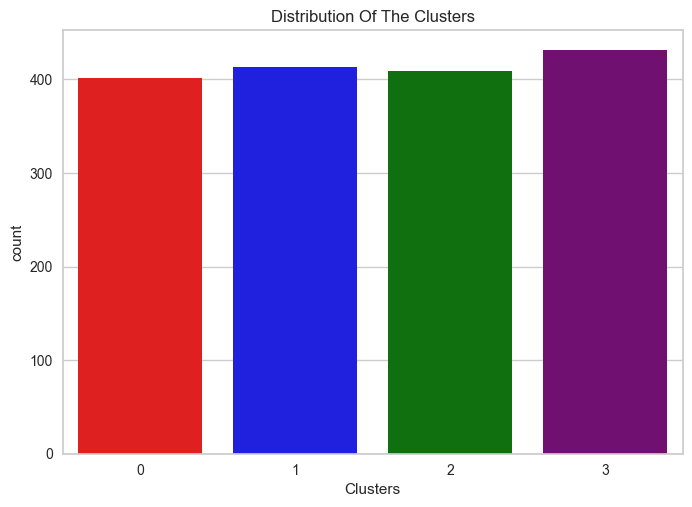

In [92]:
pal = ['red', 'blue', 'green', 'purple']
pl = sns.countplot(x=Modeling_df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# Distribution seems to be correct

# Training Data : Checking Workload cluster Based On Income And Spending (Cluster Profile)

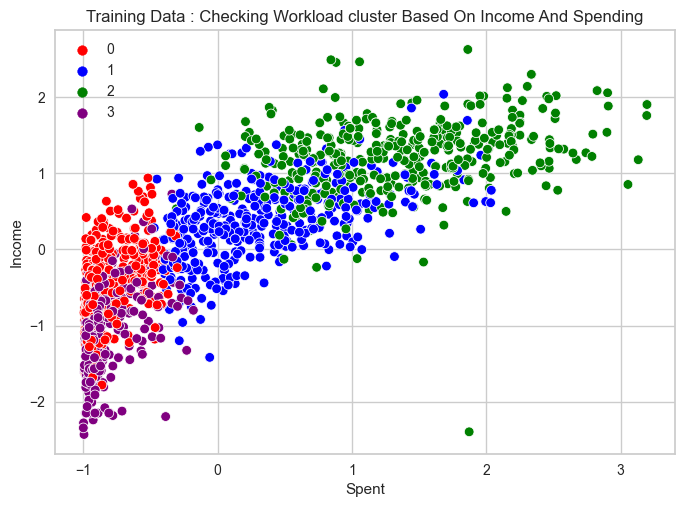

In [93]:
pl = sns.scatterplot(data = Modeling_df,x=Modeling_df["Spent"], y=Modeling_df["Income"],hue=Modeling_df["Clusters"], palette= pal)
pl.set_title("Training Data : Checking Workload cluster Based On Income And Spending")
plt.legend()
plt.show()

# The Income vs. Spending Analysis Train Data

Group 0: Below Average Income and Less Spent 

Group 1: Average Income and Above Average Spent

Group 2: High Income and High Spent

Group 3: Low Income and Low Spent

# Testing Data : Checking Workload cluster Based On Income And Spending (Cluster Profile)

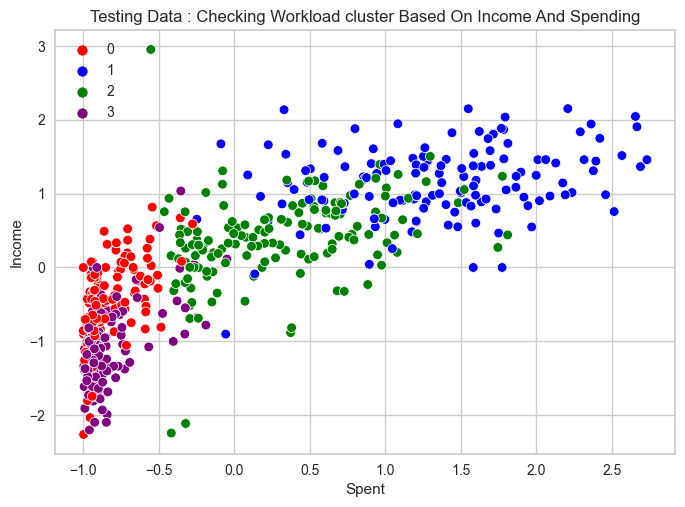

In [94]:
pl = sns.scatterplot(data = scaled_dt,x=scaled_dt["Spent"], y=scaled_dt["Income"],hue=scaled_dt["Clusters"], palette= pal)
pl.set_title("Testing Data : Checking Workload cluster Based On Income And Spending" )
plt.legend()
plt.show()

# The Income vs. Spending Analysis Test Data

Group 0: Average Income low Spent

Group 1: High Income and High Spent

Group 2: Average Income and Above Average Spent

Group 3: Low Income and Low Spent

# Evaluating other Components in the Data Set

C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

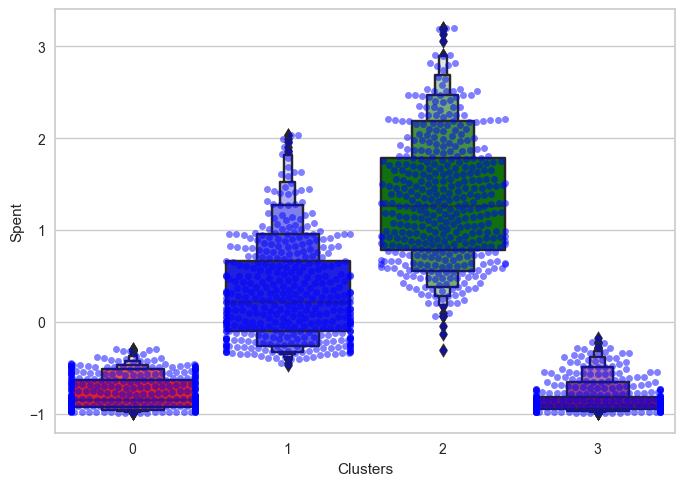

In [95]:
plt.figure()
pl=sns.swarmplot(x=Modeling_df["Clusters"], y=Modeling_df["Spent"], color= "blue", alpha=0.5 )
pl=sns.boxenplot(x=Modeling_df["Clusters"], y=Modeling_df["Spent"], palette=pal)
plt.show()

# 1 is the Biggest Cluster based on Spent and 1 is Less

# Campaigns Result

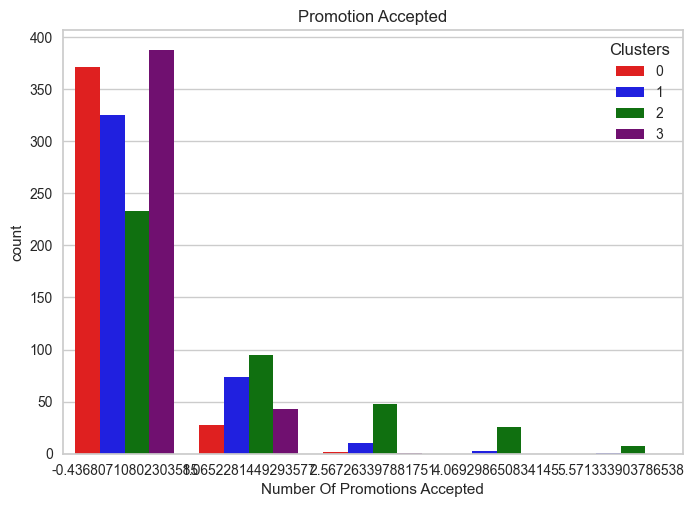

In [96]:
plt.figure()
pl = sns.countplot(x=Modeling_df['Accepted_Total'],hue=Modeling_df["Clusters"], palette= pal)
pl.set_title("Promotion Accepted")
pl.set_xlabel("Number Of Promotions Accepted")
plt.show()

# Cluster 0 Group accepted campain More and reduced there after

Accepted Campain more 1st : 0 Group

Accepted Campain more 2nd : 3 Group

Accepted Campain more 3rd : 2 Group

Accepted Campain more 4th : 1 Group

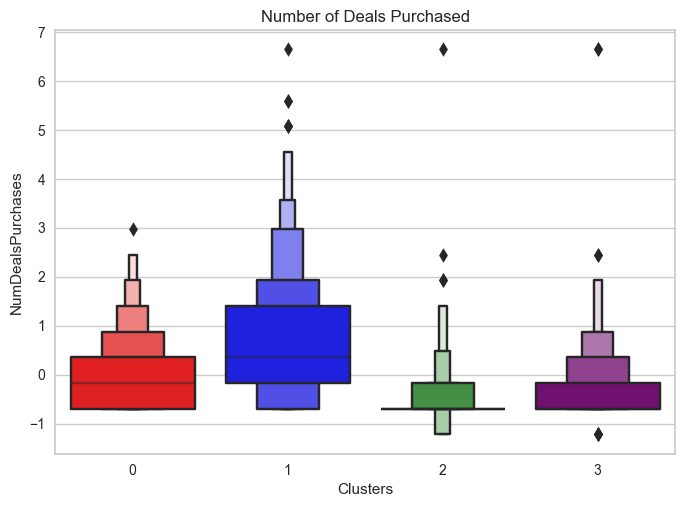

In [97]:
plt.figure()
pl=sns.boxenplot(y=Modeling_df["NumDealsPurchases"],x=Modeling_df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

# Cluster 2 Purchased more deal and 1 Less

# Analysing of Date using Random Forest Classification

In a random forest classification, multiple decision trees are created using different random subsets of the data and features. Each decision tree is like an expert, providing its opinion on how to classify the data.

In [98]:
scaled_dt.shape

(559, 21)

In [99]:
Modeling_df.shape

(1654, 21)

In [100]:
Modeling_df["Response"] = test["Response"]
Modeling_df["Response"].unique()

array([ 0.,  1., nan])

In [101]:
Modeling_df = Modeling_df.dropna()
Modeling_df.shape

(559, 22)

In [102]:
scaled_dt["Response"] = test["Response"]
scaled_dt = scaled_dt.dropna()
scaled_dt.shape

(559, 22)

In [103]:
target = ["Response"]
x_train = Modeling_df.drop(target, axis=1)
y_train = Modeling_df[target]

In [104]:
x_test = scaled_dt.drop(target,axis=1)
y_test = scaled_dt[target]

# Testing the Score of Train Data

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [107]:
model.score(x_train,y_train)

0.9928443649373881

# The Score of Train Data is 0.99,
# Based on the above Model Score it is assumed that the model prediction is accurate 

# Testing the Score of Train Data

In [108]:
model1 = RandomForestClassifier()
model1.fit(x_test,y_test)

C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [109]:
model1.score(x_test,y_test)

0.998211091234347

# The Score of Test Data is 0.99,
# Based on the above Model Score it is assumed that the model Predicting Correctly¶

# On the basis of above data we can predict the customer behaviour for Future sales forecasting